<a href="https://colab.research.google.com/github/qcesha/Data/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/universal_top_spotify_songs.csv")

In [9]:
print(df.columns)


Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


In [10]:
df.head()


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


In [11]:
print(df.shape)
print(df.info())
print(df.isna().sum())


(2110316, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signa

Пропусков в колонке name, artists, album_name незначительное количество их можно просто удалить. В album_release_date это важно для временного анализа, и чтобы данные были похожи, просто удалим пропуски здесь. В country можем просто заменить на "unknown", так как уже значительное количество данных.

In [14]:
# Заменяем пропущенные значения в 'country' на 'unknown'
df['country'] = df['country'].fillna('unknown')

# Удаляем строки, где нет даты релиза
df = df.dropna(subset=['album_release_date'])

# Удаляем строки с пропущенными значениями в 'name' или 'album_name'
df = df.dropna(subset=['name', 'album_name']).copy()

# Преобразуем в datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')



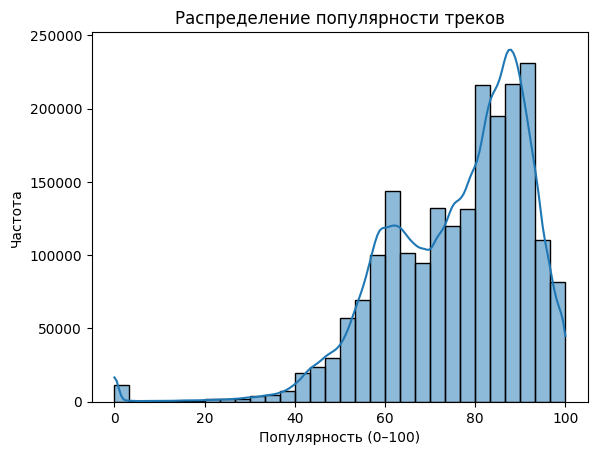

In [18]:
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title("Распределение популярности треков")
plt.xlabel("Популярность (0–100)")
plt.ylabel("Частота")
plt.show()


Распределение неравномерное и скошено влево — большинство треков имеют популярность от 60 до 90. Наиболее высокая плотность — в районе 70–90 — это говорит о том, что в чартах преобладают треки средней и высокой популярности.

In [20]:
# Создаем колонку 'duration_min'
df['duration_min'] = df['duration_ms'] / 60000

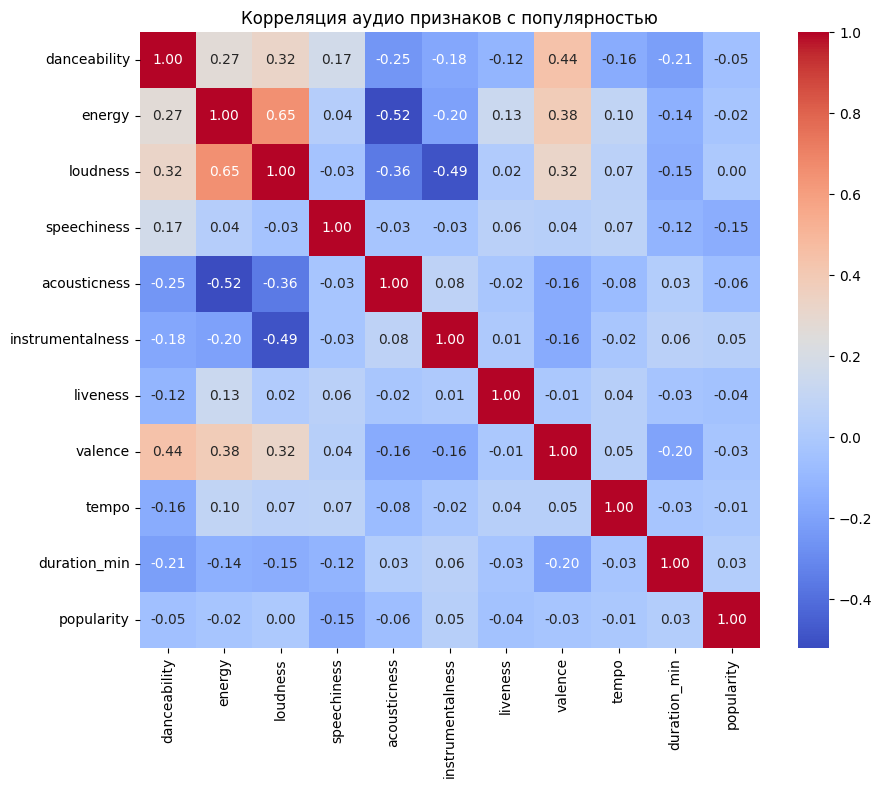

In [21]:
audio_feats = ['danceability', 'energy', 'loudness', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness',
               'valence', 'tempo', 'duration_min']

corr = df[audio_feats + ['popularity']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция аудио признаков с популярностью")
plt.show()


Аудио-характеристики, такие как "энергичность", "танцевальность", "весёлость" и т.д. почти не определяют популярность напрямую. Популярность, вероятно, определяется более внешними факторами:
страна, дата, тренды, исполнители, продвижение, чарты и т.д.



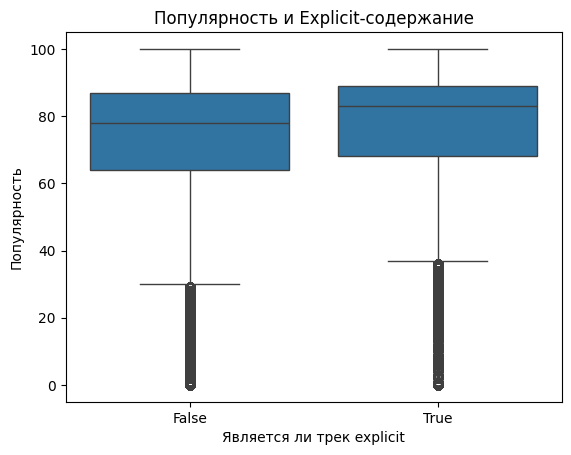

In [22]:
sns.boxplot(x='is_explicit', y='popularity', data=df)
plt.title("Популярность и Explicit-содержание")
plt.xlabel("Является ли трек explicit")
plt.ylabel("Популярность")
plt.show()


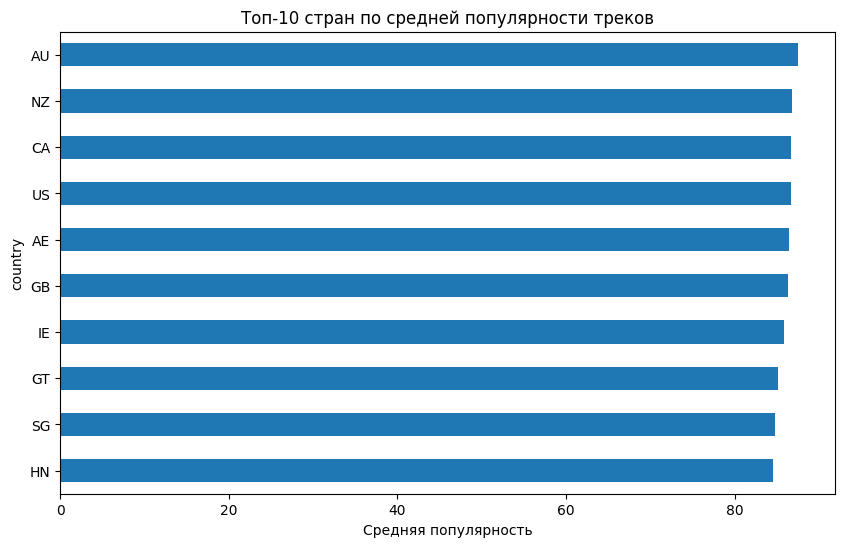

In [24]:
top_countries = (
    df[df["country"] != "unknown"]
    .groupby("country")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind='barh', figsize=(10,6))
plt.title("Топ-10 стран по средней популярности треков")
plt.xlabel("Средняя популярность")
plt.gca().invert_yaxis()
plt.show()



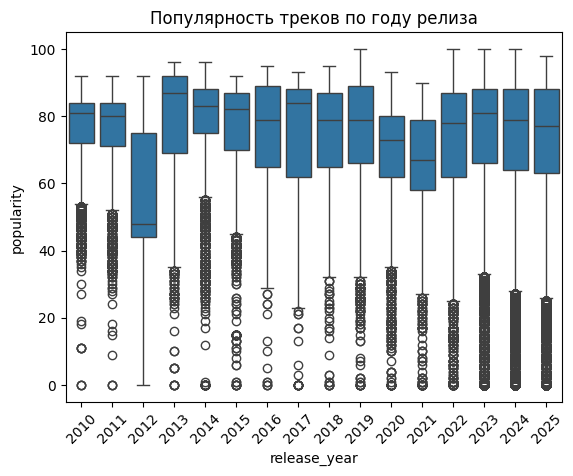

In [25]:
df['release_year'] = df['album_release_date'].dt.year
sns.boxplot(x='release_year', y='popularity', data=df[df['release_year'] >= 2010])
plt.xticks(rotation=45)
plt.title("Популярность треков по году релиза")
plt.show()


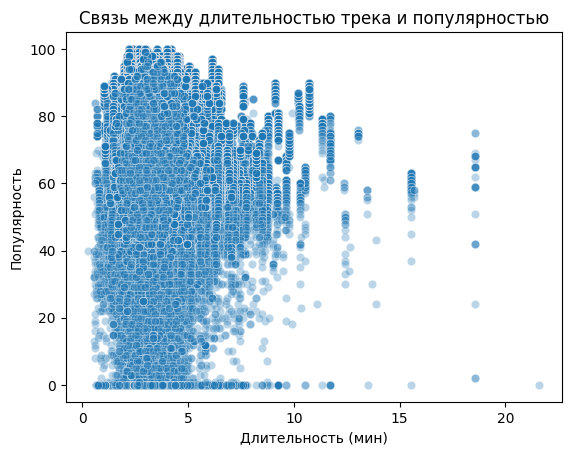

In [26]:
sns.scatterplot(x='duration_min', y='popularity', data=df, alpha=0.3)
plt.title("Связь между длительностью трека и популярностью")
plt.xlabel("Длительность (мин)")
plt.ylabel("Популярность")
plt.show()


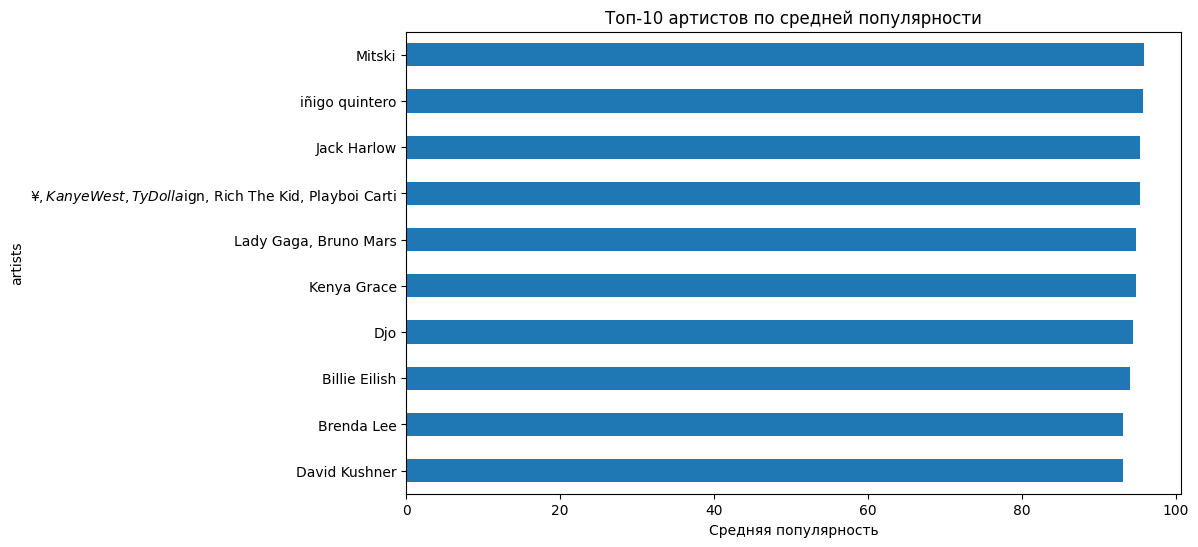

In [27]:
top_artists = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)

top_artists.plot(kind="barh", title="Топ-10 артистов по средней популярности", figsize=(10,6))
plt.xlabel("Средняя популярность")
plt.gca().invert_yaxis()
plt.show()




---



Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.

In [28]:
df["duration_minutes"] = df["duration_ms"] / 60000  # перевод длительности в минуты
df["is_short"] = (df["duration_minutes"] < 2).astype(int)  # бинарный признак
df["release_year"] = pd.to_datetime(df["album_release_date"], errors='coerce').dt.year  # год релиза
df["age_in_years"] = 2025 - df["release_year"]  # сколько лет треку

# Убедимся, что нет NaN
df = df.dropna(subset=["release_year", "age_in_years"])


In [29]:
features = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "duration_minutes",
    "is_short", "age_in_years"
]

correlations = df[features + ["popularity"]].corr()["popularity"].sort_values(ascending=False)
print(correlations)


popularity          1.000000
age_in_years        0.052647
instrumentalness    0.048092
duration_minutes    0.027480
loudness            0.000916
tempo              -0.007993
energy             -0.024523
valence            -0.026798
liveness           -0.042808
danceability       -0.053806
is_short           -0.056724
acousticness       -0.063865
speechiness        -0.147810
Name: popularity, dtype: float64


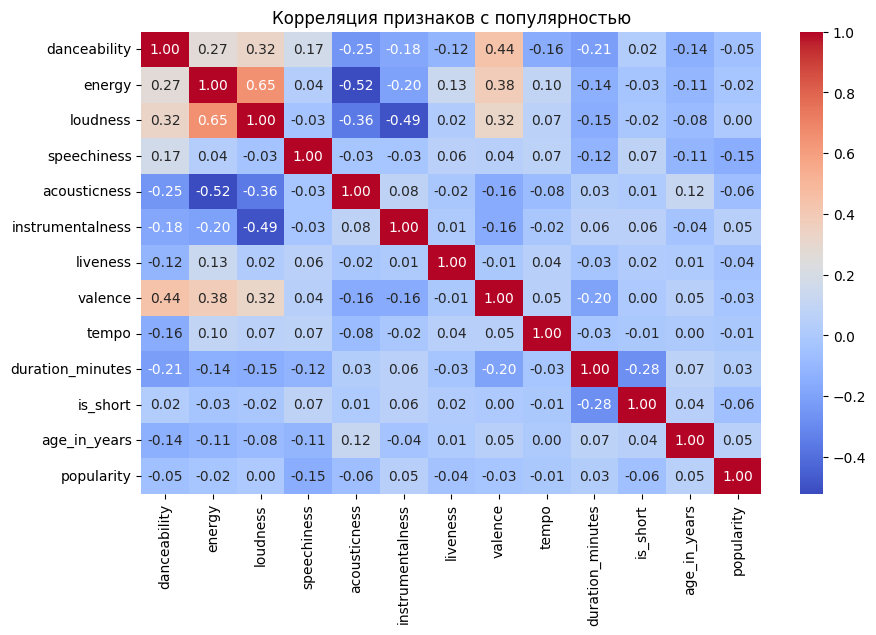

In [30]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[features + ["popularity"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков с популярностью")
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Сэмплирование (для ускорения)
df_sample = df.sample(n=10000, random_state=42)

X = df_sample[features].fillna(0)
y = df_sample["popularity"]

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель с меньшим числом деревьев
model = RandomForestRegressor(n_estimators=20, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=20, random_state=42)

In [34]:
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)



MAE: 5.932713165644743
RMSE: 10.101708808168116
R2 Score: 0.5951015836697297
